# Intro to R

As a demo of the language, plot sin and cos on the same axis:

In [1]:
# set up the default plot height and width (this is just for aesthetics)
library('repr')
options(repr.plot.width=6, repr.plot.height=5)

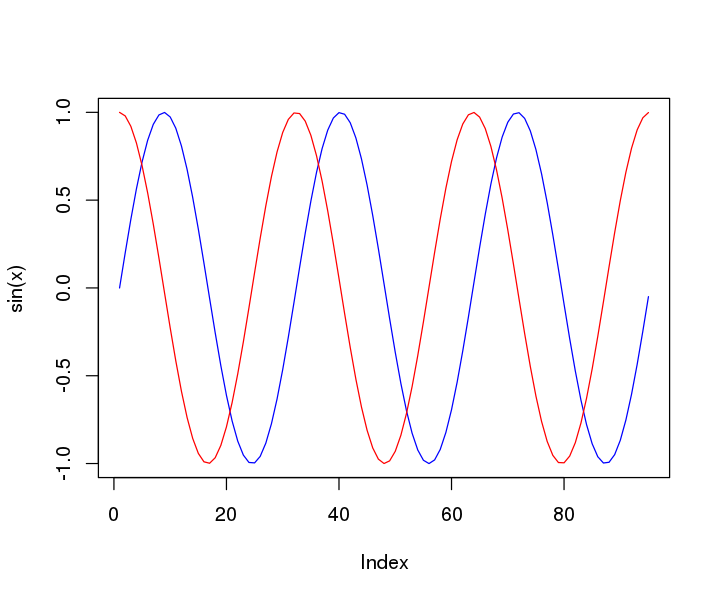

In [2]:
# define a sequence of points (start, end, by)
x = seq(0, 6*pi, .2)

# plot the sin of these points
plot(sin(x), type="l", col="blue")

# add a cos line to the plot
lines(cos(x), col="red")

# Netcdf

The easiest way to load and analyze NetCDF data in R involves the [ncdf4 package](https://cran.r-project.org/web/packages/ncdf4/ncdf4.pdf "ncdf4 Docs"). 

In [3]:
library('ncdf4')

data_url = 'http://hydromet-thredds.princeton.edu/thredds/dodsC/MonitoringStations/CR1000_Table1.nc'
variable = 'AirTC_Avg'

ds = nc_open(data_url)

In [4]:
AirT.data = ncvar_get(ds, variable)
AirT.units = ncatt_get(ds, variable, 'units')$value

In [5]:
time.data = ncvar_get(ds, 'time')
time.units = ncatt_get(ds, 'time', 'units')$value
print(time.units)

[1] "seconds since 1970-01-01"


In [6]:
# convert the time to a date string
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

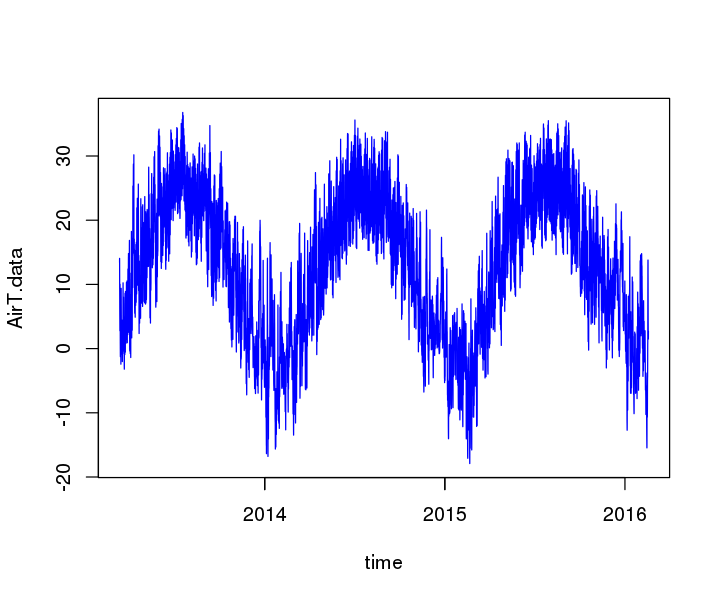

In [7]:
plot(time, AirT.data, type="l", col="blue")

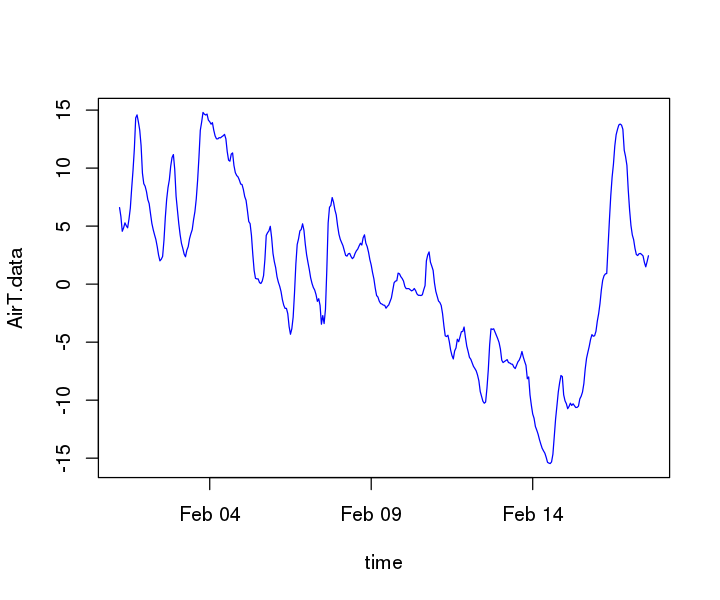

In [8]:
# define a dataframe with time as the names of the rows and air temp as the data
df = data.frame(time, AirT.data)

# select a slice using numerical indexers, and then plot that slice
slice = df[25100:25493,1:2]
plot(slice, type="l", col="blue")

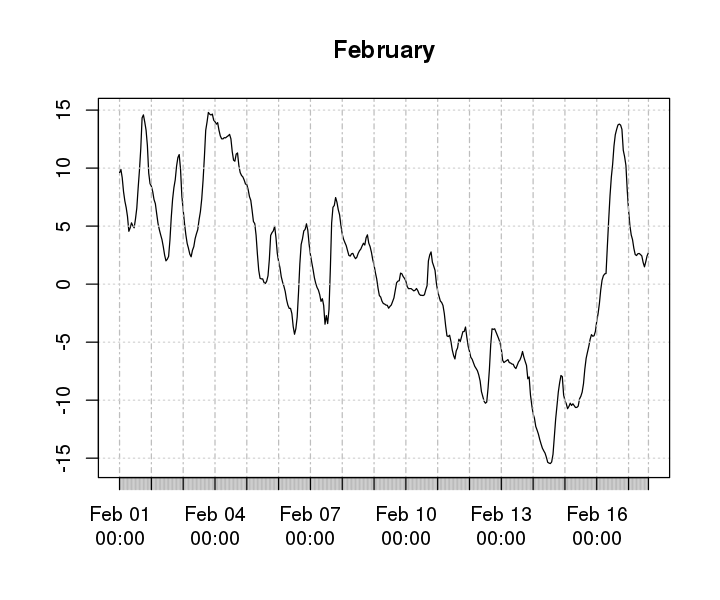

In [10]:
# use the library xts to facilitate date handling
library(xts)

# create a dataframe object
df = data.frame(row.names=time, AirT.data)

# create a xts matrix, slice it, and plot it
matrix_xts <- as.xts(df, dateFormat = "POSIXct")
February = matrix_xts['2016-02']
plot(February)